

---


### **1 - IMPORTAÇÃO DE BIBLIOTECAS E MONTAGEM DOS DADOS (DRIVE)**


---



In [1]:
#importando as bibliotecas e montando o Google Drive
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader

import pandas as pd
pd.set_option('precision', 2)
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as web

from google.colab import drive
drive.mount('/content/drive/')

#####

#####  reinicie o runtime e execute esta célula novamente (fazer isso somente na primeira vez)

#####

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#checando a versão do datareader (precisa ser a 0.10.0 para ler os dados do yahoo finance)
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, pandas, lxml
Required-by: 




---


### **2 - COLETA E PROCESSAMENTO DOS DADOS** 


---





---


#### **2.1 Carregando as bases de dados com as cotações dos Índices e tratando-as** (como já realizado, pular para o item 2.2, evitando tempo de processamento) 


---



In [ ]:
# carregando as bases de dados ".csv" - cotação dos índices 2019 a 2022:
#foi necessário ignorar a primeira linha e as duas últimas para que pudessem ser corretamente ordenadas as colunas do dataframe
#- Índice Bovespa (Ibovespa B3) 
#- Índice de Consumo (ICON B3)
#- Índice Financeiro (IFNC B3)
#- Índice do Setor Industrial (INDX B3) 
#- Índice Imobiliário (IMOB B3)
#- Índice Utilidade Pública (UTIL B3)
#- Índice MidLarge Cap (MLCX B3)
#- Índice Small Cap (SMLL B3)


ibov = pd.read_csv('/content/drive/MyDrive/IBOV.csv')
icon = pd.read_csv('/content/drive/MyDrive/ICON.csv')
ifnc = pd.read_csv('/content/drive/MyDrive/IFNC.csv')
indx = pd.read_csv('/content/drive/MyDrive/INDX.csv')
imob = pd.read_csv('/content/drive/MyDrive/IMOB.csv')
util = pd.read_csv('/content/drive/MyDrive/UTIL.csv')
mlcx = pd.read_csv('/content/drive/MyDrive/MLCX.csv')
smll = pd.read_csv('/content/drive/MyDrive/SMLL.csv')

df_list = [ibov, icon, ifnc, imob, indx, util, mlcx, smll]


In [ ]:
#obtendo informações dos dataframes

icon.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,04.05.2022,"3.554,46","3.493,62","3.565,15","3.408,96",-,"1,74%"
1,03.05.2022,"3.493,69","3.518,70","3.521,46","3.476,06",-,"-0,71%"
2,02.05.2022,"3.518,70","3.556,75","3.579,78","3.479,29",-,"-1,07%"
3,29.04.2022,"3.556,75","3.662,30","3.722,98","3.556,53",-,"-2,88%"
4,28.04.2022,"3.662,21","3.666,28","3.691,09","3.616,72",-,"-0,11%"


In [ ]:
#visualizando os dados de um dataframe aleatório
imob.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      828 non-null    object
 1   Último    828 non-null    object
 2   Abertura  828 non-null    object
 3   Máxima    828 non-null    object
 4   Mínima    828 non-null    object
 5   Vol.      828 non-null    object
 6   Var%      828 non-null    object
dtypes: object(7)
memory usage: 45.4+ KB


In [ ]:
#excluindo a coluna 'Vol.', 'Abertura','Máxima', 'Mínima', dos dataframes, pois sem utilidade no estudo
#formatando a coluna 'Var%' e convertendo-a de 'object' type para 'float' type para posterior utilização nos gráficos 
#convertendo a coluna 'Data' de 'object' type para 'datetime' type e a formatando em ordem ascendente
#formatando a coluna 'Último' e convertendo-a de 'object' type para 'float' type para posterior utilização nos gráficos 

for df in df_list:
  df['Var%'] =df['Var%'].str.rstrip("%").str.replace(',','.').astype(np.float64, copy=False)
  df.drop(['Vol.', 'Abertura','Máxima', 'Mínima'], axis=1, inplace=True)
  df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
  df.sort_values('Data', inplace=True, ignore_index=True)
  for column in df:
    if df[column].dtype=='object':
      df['Último'] =df['Último'].str.replace('.','').str.replace(',','.').astype(np.float64, copy=False)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


In [ ]:
#acrescentando uma coluna de variação dos índices('Var%2), todos partindo do 0%

def categorise(row):
  my_index = row.__dict__['_name']
  soma = 0
  for x in range(my_index + 1):
    soma += df.loc[x].at["Var%"]
  return soma

for df in df_list:
  df['Var%2'] = df.apply(lambda row: categorise(row), axis=1)

In [ ]:
ibov.head()


,Data,Último,Var%,Var%2
0,2019-01-02,91.01,3.56,3.56
1,2019-01-03,91.56,0.61,4.17
2,2019-01-04,91.84,0.30,4.47
3,2019-01-07,91.70,-0.15,4.32
4,2019-01-08,92.03,0.36,4.68
...,...,...,...,...
823,2022-04-28,109.92,0.52,36.64
824,2022-04-29,107.88,-1.86,34.78
825,2022-05-02,106.64,-1.15,33.63
826,2022-05-03,106.53,-0.10,33.53


In [ ]:
#exportando os dataframes formatados para ".csv" para não precisar cria-lo sempre, devido ao tempo de carregamento dos dados.

ibov.to_csv('/content/drive/MyDrive/IBOV2.csv', index=False)
icon.to_csv('/content/drive/MyDrive/ICON2.csv', index=False)
ifnc.to_csv('/content/drive/MyDrive/IFNC2.csv', index=False)
indx.to_csv('/content/drive/MyDrive/INDX2.csv', index=False)
imob.to_csv('/content/drive/MyDrive/IMOB2.csv', index=False)
util.to_csv('/content/drive/MyDrive/UTIL2.csv', index=False)
mlcx.to_csv('/content/drive/MyDrive/MLCX2.csv', index=False)
smll.to_csv('/content/drive/MyDrive/SMLL2.csv', index=False)



---


#### **2.2 CARREGANDO OS DATAFRAMES JÁ TRATADOSDAS COTAÇÕES DOS ÍNDICES**


---



In [2]:
#carregando os arquivos de dataframes formatados

ibov = pd.read_csv('/content/drive/MyDrive/IBOV2.csv', index_col=[0])
icon = pd.read_csv('/content/drive/MyDrive/ICON2.csv', index_col=[0])
ifnc = pd.read_csv('/content/drive/MyDrive/IFNC2.csv', index_col=[0])
indx = pd.read_csv('/content/drive/MyDrive/INDX2.csv', index_col=[0])
imob = pd.read_csv('/content/drive/MyDrive/IMOB2.csv', index_col=[0])
util = pd.read_csv('/content/drive/MyDrive/UTIL2.csv', index_col=[0])
mlcx = pd.read_csv('/content/drive/MyDrive/MLCX2.csv', index_col=[0])
smll = pd.read_csv('/content/drive/MyDrive/SMLL2.csv', index_col=[0])

In [3]:
df_list = [ibov, icon, ifnc, imob, indx, util, mlcx, smll]

In [ ]:
ibov.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
       ...
       '2022-04-20', '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
       '2022-04-28', '2022-04-29', '2022-05-02', '2022-05-03', '2022-05-04'],
      dtype='object', name='Data', length=828)

In [4]:
for df in df_list:
  df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
  

In [ ]:
print(ibov.index)
ibov

In [ ]:
ibov

,Último,Var%,Var%2
Data,,,
2019-01-02,91.01,3.56,3.56
2019-01-03,91.56,0.61,4.17
2019-01-04,91.84,0.30,4.47
2019-01-07,91.70,-0.15,4.32
2019-01-08,92.03,0.36,4.68
...,...,...,...
2022-04-28,109.92,0.52,36.64
2022-04-29,107.88,-1.86,34.78
2022-05-02,106.64,-1.15,33.63


In [5]:
df_indices_juntos = pd.DataFrame()
df_indices_juntos['ibov']=ibov['Último']
df_indices_juntos['icon']=icon['Último']
df_indices_juntos['ifnc']=ifnc['Último']
df_indices_juntos['imob']=imob['Último']
df_indices_juntos['indx']=indx['Último']
df_indices_juntos['util']=util['Último']
df_indices_juntos['mlcx']=mlcx['Último']
df_indices_juntos['smll']=smll['Último']
df_indices_juntos

,ibov,icon,ifnc,imob,indx,util,mlcx,smll
Data,,,,,,,,
2019-01-02,91.01,3495.31,10564.18,834.22,15506.53,5723.60,1743.72,1833.84
2019-01-03,91.56,3501.68,10708.01,838.99,15509.26,5863.44,1754.65,1842.05
2019-01-04,91.84,3486.63,10594.19,827.96,15630.03,5897.17,1754.85,1838.70
2019-01-07,91.70,3456.53,10611.79,823.67,15506.97,5792.71,1753.08,1824.34
2019-01-08,92.03,3467.74,10648.66,823.15,15523.34,5829.44,1760.01,1817.91
...,...,...,...,...,...,...,...,...
2022-04-28,109.92,3662.21,10293.92,739.89,21859.08,9312.65,2176.32,2362.14
2022-04-29,107.88,3556.75,10072.71,733.76,21346.07,9118.52,2136.90,2312.44
2022-05-02,106.64,3518.70,9946.17,726.04,21161.21,9001.86,2113.60,2263.60


In [6]:
df_indices_juntos_var = pd.DataFrame()
df_indices_juntos_var['ibov var']=ibov['Var%']
df_indices_juntos_var['icon var']=icon['Var%']
df_indices_juntos_var['ifnc var']=ifnc['Var%']
df_indices_juntos_var['imob var']=imob['Var%']
df_indices_juntos_var['indx var']=indx['Var%']
df_indices_juntos_var['util var']=util['Var%']
df_indices_juntos_var['mlcx var']=mlcx['Var%']
df_indices_juntos_var['smll var']=smll['Var%']
df_indices_juntos_var

,ibov var,icon var,ifnc var,imob var,indx var,util var,mlcx var,smll var
Data,,,,,,,,
2019-01-02,3.56,2.80,4.32,2.47,2.72,4.29,3.59,2.12
2019-01-03,0.61,0.18,1.36,0.57,0.02,2.44,0.63,0.45
2019-01-04,0.30,-0.43,-1.06,-1.31,0.78,0.58,0.01,-0.18
2019-01-07,-0.15,-0.86,0.17,-0.52,-0.79,-1.77,-0.10,-0.78
2019-01-08,0.36,0.32,0.35,-0.06,0.11,0.63,0.40,-0.35
...,...,...,...,...,...,...,...,...
2022-04-28,0.52,-0.11,-0.12,1.31,0.51,0.03,0.61,0.89
2022-04-29,-1.86,-2.88,-2.15,-0.83,-2.35,-2.08,-1.81,-2.10
2022-05-02,-1.15,-1.07,-1.26,-1.05,-0.87,-1.28,-1.09,-2.11




---


#### **2.3 - Coletando os dados de cotações das ações componentes dos Índices e tratando-as**


---



In [7]:
#obtendo a lista de todas as ações componentes dos índices do estudo em 04/05/2022

comp_ibov = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_ibov/IBOVDia_04-05-22.csv', 
            engine = 'python', header = None, names=['Setor','Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)','Part.(%)Acum', 'Nan'], 
            usecols=[1,2,5], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_icon = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_icon/ICONDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_imob = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_imob/IMOBDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_indx = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_indx/INDXDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_ifnc = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_ifnc/IFNCDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_mlcx = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_mlcx/MLCXDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_smll = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_smll/SMLLDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')
comp_util = pd.read_csv('/content/drive/MyDrive/planilhas_tcc/cotahist_util/UTILDia_04-05-22.csv', 
                        engine = 'python', header = None, names=['Código','Ação','Tipo','Qtde. Teórica', 'Part.(%)', 'Nan'], 
                    usecols=[0,1,4], skiprows=2, skipfooter=2, sep=";", encoding='ISO-8859-1')

In [8]:
#criando as listas de 'tickers' das ações componentes de todos os índices

ac_ibov=comp_ibov['Código'].tolist()
ac_icon=comp_icon['Código'].tolist()
ac_imob=comp_imob['Código'].tolist()
ac_indx=comp_indx['Código'].tolist()
ac_ifnc=comp_ifnc['Código'].tolist()
ac_mlcx=comp_mlcx['Código'].tolist()
ac_smll=comp_smll['Código'].tolist()
ac_util=comp_util['Código'].tolist()

In [9]:
# acrescentando a extensão ".SA" nos tickers
# para possibilitar a busca de dados no yahoo finance

ext='.SA'

ac_ibovsa=[ticker+ext for ticker in ac_ibov]
ac_ibovsa = list(set(ac_ibovsa))  
ac_iconsa=[ticker+ext for ticker in ac_icon]
ac_iconsa = list(set(ac_iconsa))
ac_ifncsa=[ticker+ext for ticker in ac_ifnc]
ac_ifncsa = list(set(ac_ifncsa))
ac_imobsa=[ticker+ext for ticker in ac_imob]
ac_imobsa = list(set(ac_imobsa))
ac_indxsa=[ticker+ext for ticker in ac_indx]
ac_indxsa = list(set(ac_indxsa))
ac_utilsa=[ticker+ext for ticker in ac_util]
ac_utilsa = list(set(ac_utilsa))
ac_mlcxsa=[ticker+ext for ticker in ac_mlcx]
ac_mlcxsa = list(set(ac_mlcxsa))
ac_smllsa=[ticker+ext for ticker in ac_smll]
ac_smllsa = list(set(ac_smllsa))


In [ ]:
#visualizando a formatação de uma lista

print(ac_iconsa,)

['MRVE3.SA', 'ASAI3.SA', 'VIIA3.SA', 'ANIM3.SA', 'VIVA3.SA', 'AMER3.SA', 'AMAR3.SA', 'ABEV3.SA', 'BKBR3.SA', 'VULC3.SA', 'TCSA3.SA', 'RAIZ4.SA', 'ESPA3.SA', 'GFSA3.SA', 'GUAR3.SA', 'ALPA4.SA', 'ONCO3.SA', 'PETZ3.SA', 'MYPK3.SA', 'VIVR3.SA', 'HBOR3.SA', 'EVEN3.SA', 'GRND3.SA', 'LEVE3.SA', 'VAMO3.SA', 'RDOR3.SA', 'CSED3.SA', 'JBSS3.SA', 'ODPV3.SA', 'COGN3.SA', 'PLPL3.SA', 'CAML3.SA', 'MEAL3.SA', 'MTRE3.SA', 'MATD3.SA', 'SLCE3.SA', 'SEER3.SA', 'YDUQ3.SA', 'SMTO3.SA', 'EZTC3.SA', 'FLRY3.SA', 'PARD3.SA', 'SOJA3.SA', 'CEAB3.SA', 'MOVI3.SA', 'SOMA3.SA', 'BRFS3.SA', 'ARZZ3.SA', 'AGRO3.SA', 'CYRE3.SA', 'TEND3.SA', 'RENT3.SA', 'DIRR3.SA', 'PNVL3.SA', 'RADL3.SA', 'NTCO3.SA', 'SBFG3.SA', 'LJQQ3.SA', 'HYPE3.SA', 'SMFT3.SA', 'BLAU3.SA', 'BEEF3.SA', 'PGMN3.SA', 'CVCB3.SA', 'DASA3.SA', 'MRFG3.SA', 'LREN3.SA', 'CRFB3.SA', 'PCAR3.SA', 'HAPV3.SA', 'GMAT3.SA', 'QUAL3.SA', 'LAVV3.SA', 'LCAM3.SA', 'MGLU3.SA', 'AALR3.SA', 'MDIA3.SA', 'ALLD3.SA', 'JHSF3.SA', 'TRIS3.SA', 'TTEN3.SA', 'CURY3.SA', 'JALL3.SA', 'TE

In [13]:
ac_all = ac_ibov+ac_icon+ac_ifnc+ac_imob+ac_indx+ac_util+ac_mlcx+ac_smll
len(set(ac_all))

213

####**Como já realizado, pular para o item 2.4, evitando tempo de processamento**


In [ ]:
####
####
####
####
####   FEITO SOMENTE UMA VEZ, PULAR PARA A LEITURA DOS ARQUIVOS '.CSV' EXPORTADOS DEVIDO AO TEMPO DE EXECUÇÃO
####
####
####
####

#obtendo a cotação de todas as ações componentes dos índices no yahoo finance

c = web.DataReader(ac_ibovsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_ibov = c[[("Adj Close", s) for s in ac_ibovsa]]
c_ibov.columns = c_ibov.columns.droplevel(level=0)

c = web.DataReader(ac_iconsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_icon = c[[("Adj Close", s) for s in ac_iconsa]]
c_icon.columns = c_icon.columns.droplevel(level=0)

c = web.DataReader(ac_ifncsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_ifnc = c[[("Adj Close", s) for s in ac_ifncsa]]
c_ifnc.columns = c_ifnc.columns.droplevel(level=0)

c = web.DataReader(ac_imobsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_imob = c[[("Adj Close", s) for s in ac_imobsa]]
c_imob.columns = c_imob.columns.droplevel(level=0)

c = web.DataReader(ac_indxsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_indx = c[[("Adj Close", s) for s in ac_indxsa]]
c_indx.columns = c_indx.columns.droplevel(level=0)

c = web.DataReader(ac_utilsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_util = c[[("Adj Close", s) for s in ac_utilsa]]
c_util.columns = c_util.columns.droplevel(level=0)

c = web.DataReader(ac_mlcxsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_mlcx = c[[("Adj Close", s) for s in ac_mlcxsa]]
c_mlcx.columns = c_mlcx.columns.droplevel(level=0)

#obtendo a cotação de todas as ações componentes dos índices no yahoo finance

c = web.DataReader(ac_smllsa, data_source='yahoo', start='01-01-2019',end='05-04-2022')
c_smll = c[[("Adj Close", s) for s in ac_smllsa]]
c_smll.columns = c_smll.columns.droplevel(level=0)

In [ ]:
#exportando os dataframes criados para as cotações das ações componentes dos índices para ".csv",
# a fim de não precisar cria-los sempre, devido ao tempo de carregamento dos dados.

c_ibov.to_csv('/content/drive/MyDrive/c_ibov.csv')
c_icon.to_csv('/content/drive/MyDrive/c_icon.csv')
c_ifnc.to_csv('/content/drive/MyDrive/c_ifnc.csv')
c_imob.to_csv('/content/drive/MyDrive/c_imob.csv')
c_indx.to_csv('/content/drive/MyDrive/c_indx.csv')
c_util.to_csv('/content/drive/MyDrive/c_util.csv')
c_mlcx.to_csv('/content/drive/MyDrive/c_mlcx.csv')
c_smll.to_csv('/content/drive/MyDrive/c_smll.csv')



---


#### **2.4 CARREGANDO OS DATAFRAMES JÁ TRATADOS DAS COTAÇÕES DAS AÇÕES COMPONENTES DOS ÍNDICES**


---



In [14]:
####
####
####
####    VOLTAR A EXECUTAR DAQUI
####
####
####
#lendo os arquivos '.csv' como dataframes

c_ibov= pd.read_csv('/content/drive/MyDrive/c_ibov.csv')
c_icon= pd.read_csv('/content/drive/MyDrive/c_icon.csv')
c_ifnc= pd.read_csv('/content/drive/MyDrive/c_ifnc.csv')
c_imob= pd.read_csv('/content/drive/MyDrive/c_imob.csv')
c_indx= pd.read_csv('/content/drive/MyDrive/c_indx.csv')
c_util= pd.read_csv('/content/drive/MyDrive/c_util.csv')
c_mlcx= pd.read_csv('/content/drive/MyDrive/c_mlcx.csv')
c_smll= pd.read_csv('/content/drive/MyDrive/c_smll.csv')




In [15]:
# criando dataframes individuais para cada empresa componente dos índices setoriais
# acrescentar a coluna de variação
# transformar o índice para datetime
# calculando a variação anual
# retornar o novo dataframe
# concatenando todas os dataframes individuais em um único dataframe, por índice setorial

list_ind = [{"lista": ac_ibovsa, "df": c_ibov, "indice": "Ibov"}, {"lista": ac_iconsa, "df": c_icon, "indice": "Icon"},
            {"lista": ac_ifncsa, "df": c_ifnc, "indice":"Ifnc"}, {"lista": ac_imobsa, "df": c_imob, "indice":"Imob"}, 
            {"lista": ac_indxsa, "df": c_indx, "indice":"Indx"},  {"lista": ac_utilsa, "df": c_util, "indice":"Util"},
            {"lista": ac_mlcxsa, "df":c_mlcx, "indice":"Mlcx"}, {"lista":ac_smllsa, "df":c_smll, "indice":"Smll"}]

def calculo(df, row, key):
  my_index = row.__dict__['_name']
  if my_index == 0:
    return 0
  else:
    anterior = df[key][my_index - 1]
    x = ((row[key]-anterior)/anterior)*100
    anterior = row[key]
    return x

resultados = []

for dic in list_ind:
  df_final = None
  for ticker in dic["lista"]:
    # criando dataframes individuais para cada empresa componente dos índices setoriais
    df = dic["df"][['Date', ticker]].copy()
    # acrescentando a coluna de variação
    df[f'var_{ticker}'] = df.apply(lambda row: calculo(df, row, ticker), axis=1)
    # usando o método set_index() na coluna 'Date'
    df.set_index('Date', inplace=True)
    # definindo o index para 'None' via sua propriedade de nome
    df.index.names = [None]
    #convertendo o index para o formato datetime
    df.index = pd.to_datetime(df.index)
    # calculando a variação anual
    df = df.resample("Y").sum()
    # concatenando todas os dataframes individuais em um único dataframe, por índice setorial
    if df_final is not None:
      df_final = pd.concat([df_final, df], axis=1)
    else:
      df_final = df
# criando novas colunas nos dataframes com os valores mínimo, máximo e média      
  df_final.replace(0, np.nan, inplace = True)
  df_final['Max']=df_final[[x for x in df_final.columns if x.startswith("var_") ]].apply(np.nanmax,axis=1)
  df_final['Min']=df_final[[x for x in df_final.columns if x.startswith("var_")]].apply(np.nanmin,axis=1)
  df_final['Med']=df_final[[x for x in df_final.columns if x.startswith("var_")]].apply(np.nanmean,axis=1)
  resultado = {"indice": dic["indice"], "df": df_final}
  resultados.append(resultado)


In [16]:
cmpnts_ibov=[x for x in resultados if x["indice"] == "Ibov"][0]["df"]
cmpnts_icon=[x for x in resultados if x["indice"] == "Icon"][0]["df"]
cmpnts_ifnc=[x for x in resultados if x["indice"] == "Ifnc"][0]["df"]
cmpnts_imob=[x for x in resultados if x["indice"] == "Imob"][0]["df"]
cmpnts_indx=[x for x in resultados if x["indice"] == "Indx"][0]["df"]
cmpnts_util=[x for x in resultados if x["indice"] == "Util"][0]["df"]
cmpnts_mlcx=[x for x in resultados if x["indice"] == "Mlcx"][0]["df"]
cmpnts_smll=[x for x in resultados if x["indice"] == "Smll"][0]["df"]
cmpnts_list=[cmpnts_ibov,cmpnts_icon, cmpnts_ifnc,cmpnts_imob,cmpnts_indx,cmpnts_util,cmpnts_mlcx,cmpnts_smll]

In [ ]:
cmpnts_util

,AMBP3.SA,var_AMBP3.SA,SBSP3.SA,var_SBSP3.SA,CPFE3.SA,var_CPFE3.SA,MEGA3.SA,var_MEGA3.SA,SAPR11.SA,var_SAPR11.SA,...,var_ELET3.SA,ORVR3.SA,var_ORVR3.SA,LIGT3.SA,var_LIGT3.SA,ELET6.SA,var_ELET6.SA,Max,Min,Med
2019-12-31,NaN,NaN,11311.79,66.00,5986.49,24.28,NaN,NaN,5938.31,59.00,...,59.58,NaN,NaN,4779.19,41.95,7742.24,27.97,99.48,7.63,46.22
2020-12-31,3281.40,-7.74,12329.25,-10.28,6428.21,12.69,NaN,NaN,6481.44,-10.53,...,34.85,NaN,NaN,4172.17,26.56,7356.70,27.33,47.93,-20.32,13.34
2021-12-31,9363.42,59.74,9459.45,-3.75,6478.34,-2.56,49.63,7.35,4800.51,-23.83,...,6.56,5477.53,26.07,3896.32,-58.28,9040.10,3.70,59.74,-58.28,2.11
2022-12-31,2987.05,-16.14,3500.44,13.66,2565.26,22.59,942.96,-13.75,1647.93,6.79,...,19.81,2407.77,29.44,845.50,-23.21,2965.38,20.00,29.44,-23.21,6.40


##### **2.5 CRIANDO DATAFRAMES, POR ANO E ÍNDICE SETORIAL, COM AS 5 MAIORES ALTAS E QUEDAS** 


In [17]:
temp_cmpnts_ibov=cmpnts_ibov.drop(labels = ([x for x in cmpnts_ibov.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_ibov.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_ibov.rename(columns=mapper, inplace=True)
majors_ibov2019=temp_cmpnts_ibov.iloc[0].nlargest(5).to_frame().T
minors_ibov2019=temp_cmpnts_ibov.iloc[0].nsmallest(5).to_frame().T
majmin_ibov2019=pd.concat([majors_ibov2019,minors_ibov2019], axis=1)
majors_ibov2020=temp_cmpnts_ibov.iloc[1].nlargest(5).to_frame().T
minors_ibov2020=temp_cmpnts_ibov.iloc[1].nsmallest(5).to_frame().T
majmin_ibov2020=pd.concat([majors_ibov2020,minors_ibov2020], axis=1)
majors_ibov2021=temp_cmpnts_ibov.iloc[2].nlargest(5).to_frame().T
minors_ibov2021=temp_cmpnts_ibov.iloc[2].nsmallest(5).to_frame().T
majmin_ibov2021=pd.concat([majors_ibov2021,minors_ibov2021], axis=1)
majors_ibov2022=temp_cmpnts_ibov.iloc[3].nlargest(5).to_frame().T
minors_ibov2022=temp_cmpnts_ibov.iloc[3].nsmallest(5).to_frame().T
majmin_ibov2022=pd.concat([majors_ibov2022,minors_ibov2022], axis=1)

temp_cmpnts_icon=cmpnts_icon.drop(labels = ([x for x in cmpnts_icon.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_icon.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_icon.rename(columns=mapper, inplace=True)
majors_icon2019=temp_cmpnts_icon.iloc[0].nlargest(5).to_frame().T
minors_icon2019=temp_cmpnts_icon.iloc[0].nsmallest(5).to_frame().T
majmin_icon2019=pd.concat([majors_icon2019,minors_icon2019], axis=1)
majors_icon2020=temp_cmpnts_icon.iloc[1].nlargest(5).to_frame().T
minors_icon2020=temp_cmpnts_icon.iloc[1].nsmallest(5).to_frame().T
majmin_icon2020=pd.concat([majors_icon2020,minors_icon2020], axis=1)
majors_icon2021=temp_cmpnts_icon.iloc[2].nlargest(5).to_frame().T
minors_icon2021=temp_cmpnts_icon.iloc[2].nsmallest(5).to_frame().T
majmin_icon2021=pd.concat([majors_icon2021,minors_icon2021], axis=1)
majors_icon2022=temp_cmpnts_icon.iloc[3].nlargest(5).to_frame().T
minors_icon2022=temp_cmpnts_icon.iloc[3].nsmallest(5).to_frame().T
majmin_icon2022=pd.concat([majors_icon2022,minors_icon2022], axis=1)

temp_cmpnts_ifnc=cmpnts_ifnc.drop(labels = ([x for x in cmpnts_ifnc.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_ifnc.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_ifnc.rename(columns=mapper, inplace=True)
majors_ifnc2019=temp_cmpnts_ifnc.iloc[0].nlargest(5).to_frame().T
minors_ifnc2019=temp_cmpnts_ifnc.iloc[0].nsmallest(5).to_frame().T
majmin_ifnc2019=pd.concat([majors_ifnc2019,minors_ifnc2019], axis=1)
majors_ifnc2020=temp_cmpnts_ifnc.iloc[1].nlargest(5).to_frame().T
minors_ifnc2020=temp_cmpnts_ifnc.iloc[1].nsmallest(5).to_frame().T
majmin_ifnc2020=pd.concat([majors_ifnc2020,minors_ifnc2020], axis=1)
majors_ifnc2021=temp_cmpnts_ifnc.iloc[2].nlargest(5).to_frame().T
minors_ifnc2021=temp_cmpnts_ifnc.iloc[2].nsmallest(5).to_frame().T
majmin_ifnc2021=pd.concat([majors_ifnc2021,minors_ifnc2021], axis=1)
majors_ifnc2022=temp_cmpnts_ifnc.iloc[3].nlargest(5).to_frame().T
minors_ifnc2022=temp_cmpnts_ifnc.iloc[3].nsmallest(5).to_frame().T
majmin_ifnc2022=pd.concat([majors_ifnc2022,minors_ifnc2022], axis=1)

temp_cmpnts_imob=cmpnts_imob.drop(labels = ([x for x in cmpnts_imob.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_imob.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_imob.rename(columns=mapper, inplace=True)
majors_imob2019=temp_cmpnts_imob.iloc[0].nlargest(5).to_frame().T
minors_imob2019=temp_cmpnts_imob.iloc[0].nsmallest(5).to_frame().T
majmin_imob2019=pd.concat([majors_imob2019,minors_imob2019], axis=1)
majors_imob2020=temp_cmpnts_imob.iloc[1].nlargest(5).to_frame().T
minors_imob2020=temp_cmpnts_imob.iloc[1].nsmallest(5).to_frame().T
majmin_imob2020=pd.concat([majors_imob2020,minors_imob2020], axis=1)
majors_imob2021=temp_cmpnts_imob.iloc[2].nlargest(5).to_frame().T
minors_imob2021=temp_cmpnts_imob.iloc[2].nsmallest(5).to_frame().T
majmin_imob2021=pd.concat([majors_imob2021,minors_imob2021], axis=1)
majors_imob2022=temp_cmpnts_imob.iloc[3].nlargest(5).to_frame().T
minors_imob2022=temp_cmpnts_imob.iloc[3].nsmallest(5).to_frame().T
majmin_imob2022=pd.concat([majors_imob2022,minors_imob2022], axis=1)

temp_cmpnts_indx=cmpnts_indx.drop(labels = ([x for x in cmpnts_indx.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_indx.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_indx.rename(columns=mapper, inplace=True)
majors_indx2019=temp_cmpnts_indx.iloc[0].nlargest(5).to_frame().T
minors_indx2019=temp_cmpnts_indx.iloc[0].nsmallest(5).to_frame().T
majmin_indx2019=pd.concat([majors_indx2019,minors_indx2019], axis=1)
majors_indx2020=temp_cmpnts_indx.iloc[1].nlargest(5).to_frame().T
minors_indx2020=temp_cmpnts_indx.iloc[1].nsmallest(5).to_frame().T
majmin_indx2020=pd.concat([majors_indx2020,minors_indx2020], axis=1)
majors_indx2021=temp_cmpnts_indx.iloc[2].nlargest(5).to_frame().T
minors_indx2021=temp_cmpnts_indx.iloc[2].nsmallest(5).to_frame().T
majmin_indx2021=pd.concat([majors_indx2021,minors_indx2021], axis=1)
majors_indx2022=temp_cmpnts_indx.iloc[3].nlargest(5).to_frame().T
minors_indx2022=temp_cmpnts_indx.iloc[3].nsmallest(5).to_frame().T
majmin_indx2022=pd.concat([majors_indx2022,minors_indx2022], axis=1)

temp_cmpnts_util=cmpnts_util.drop(labels = ([x for x in cmpnts_util.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_util.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_util.rename(columns=mapper, inplace=True)
majors_util2019=temp_cmpnts_util.iloc[0].nlargest(5).to_frame().T
minors_util2019=temp_cmpnts_util.iloc[0].nsmallest(5).to_frame().T
majmin_util2019=pd.concat([majors_util2019,minors_util2019], axis=1)
majors_util2020=temp_cmpnts_util.iloc[1].nlargest(5).to_frame().T
minors_util2020=temp_cmpnts_util.iloc[1].nsmallest(5).to_frame().T
majmin_util2020=pd.concat([majors_util2020,minors_util2020], axis=1)
majors_util2021=temp_cmpnts_util.iloc[2].nlargest(5).to_frame().T
minors_util2021=temp_cmpnts_util.iloc[2].nsmallest(5).to_frame().T
majmin_util2021=pd.concat([majors_util2021,minors_util2021], axis=1)
majors_util2022=temp_cmpnts_util.iloc[3].nlargest(5).to_frame().T
minors_util2022=temp_cmpnts_util.iloc[3].nsmallest(5).to_frame().T
majmin_util2022=pd.concat([majors_util2022,minors_util2022], axis=1)

temp_cmpnts_mlcx=cmpnts_mlcx.drop(labels = ([x for x in cmpnts_mlcx.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_mlcx.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_mlcx.rename(columns=mapper, inplace=True)
majors_mlcx2019=temp_cmpnts_mlcx.iloc[0].nlargest(5).to_frame().T
minors_mlcx2019=temp_cmpnts_mlcx.iloc[0].nsmallest(5).to_frame().T
majmin_mlcx2019=pd.concat([majors_mlcx2019,minors_mlcx2019], axis=1)
majors_mlcx2020=temp_cmpnts_mlcx.iloc[1].nlargest(5).to_frame().T
minors_mlcx2020=temp_cmpnts_mlcx.iloc[1].nsmallest(5).to_frame().T
majmin_mlcx2020=pd.concat([majors_mlcx2020,minors_mlcx2020], axis=1)
majors_mlcx2021=temp_cmpnts_mlcx.iloc[2].nlargest(5).to_frame().T
minors_mlcx2021=temp_cmpnts_mlcx.iloc[2].nsmallest(5).to_frame().T
majmin_mlcx2021=pd.concat([majors_mlcx2021,minors_mlcx2021], axis=1)
majors_mlcx2022=temp_cmpnts_mlcx.iloc[3].nlargest(5).to_frame().T
minors_mlcx2022=temp_cmpnts_mlcx.iloc[3].nsmallest(5).to_frame().T
majmin_mlcx2022=pd.concat([majors_mlcx2022,minors_mlcx2022], axis=1)

temp_cmpnts_smll=cmpnts_smll.drop(labels = ([x for x in cmpnts_smll.columns if not x.startswith("var_")]), axis=1)
mapper = {}
for x in temp_cmpnts_smll.columns:
  x2 = x[4:9]
  mapper[x] = x2
temp_cmpnts_smll.rename(columns=mapper, inplace=True)
majors_smll2019=temp_cmpnts_smll.iloc[0].nlargest(5).to_frame().T
minors_smll2019=temp_cmpnts_smll.iloc[0].nsmallest(5).to_frame().T
majmin_smll2019=pd.concat([majors_smll2019,minors_smll2019], axis=1)
majors_smll2020=temp_cmpnts_smll.iloc[1].nlargest(5).to_frame().T
minors_smll2020=temp_cmpnts_smll.iloc[1].nsmallest(5).to_frame().T
majmin_smll2020=pd.concat([majors_smll2020,minors_smll2020], axis=1)
majors_smll2021=temp_cmpnts_smll.iloc[2].nlargest(5).to_frame().T
minors_smll2021=temp_cmpnts_smll.iloc[2].nsmallest(5).to_frame().T
majmin_smll2021=pd.concat([majors_smll2021,minors_smll2021], axis=1)
majors_smll2022=temp_cmpnts_smll.iloc[3].nlargest(5).to_frame().T
minors_smll2022=temp_cmpnts_smll.iloc[3].nsmallest(5).to_frame().T
majmin_smll2022=pd.concat([majors_smll2022,minors_smll2022], axis=1)

In [ ]:
majmin_ibov2020

,LWSA3,PRIO3,CSNA3,BIDI1,MGLU3,PCAR3,IRBR3,COGN3,EMBR3,CIEL3
2020-12-31,165.02,136.77,112.08,100.8,100.62,-91.76,-86.64,-56.24,-50.84,-44.94


In [18]:
lista_majmin_2020=[majmin_ibov2020,majmin_mlcx2020, majmin_smll2020, majmin_icon2020, majmin_ifnc2020, majmin_imob2020, majmin_indx2020, majmin_util2020]
lista_majmin_2021=[majmin_ibov2021,majmin_mlcx2021, majmin_smll2021, majmin_icon2021, majmin_ifnc2021, majmin_imob2021, majmin_indx2021, majmin_util2021]
lista_majmin_2022=[majmin_ibov2022,majmin_mlcx2022, majmin_smll2022, majmin_icon2022, majmin_ifnc2022, majmin_imob2022, majmin_indx2022, majmin_util2022]
lista_majmin_all=[lista_majmin_2020+lista_majmin_2021+lista_majmin_2022]
lista_majmin_all

[[             LWSA3   PRIO3   CSNA3  BIDI1   MGLU3  PCAR3  IRBR3  COGN3  EMBR3  \
  2020-12-31  165.02  136.77  112.08  100.8  100.62 -91.76 -86.64 -56.24 -50.84   
  
              CIEL3  
  2020-12-31 -44.94  ,
               PRIO3   CSNA3  BIDI1   MGLU3  WEGE3  BRFS3  NEOE3  RAIL3  VBBR3  \
  2020-12-31  136.77  112.08  100.8  100.62  96.18 -27.84 -20.32 -13.42 -12.94   
  
              SBSP3  
  2020-12-31 -10.28  ,
               RCSL3   LWSA3   DEXP3   TASA4  VIIA3  PCAR3  IRBR3  PMAM3  TECN3  \
  2020-12-31  246.02  165.02  144.29  132.71  79.81 -91.76 -86.64 -75.74 -74.82   
  
              COGN3  
  2020-12-31 -56.24  ,
               MGLU3  VIIA3  RENT3  MRFG3  LCAM3  PCAR3  TECN3  COGN3  GFSA3  \
  2020-12-31  100.62  79.81  65.65  62.64  60.71 -91.76 -74.82 -56.24 -32.88   
  
              SEER3  
  2020-12-31 -32.44  ,
              BIDI1  B3SA3  BPAC1  CARD3  BPAN4  IRBR3  CIEL3  WIZS3  BMGB4  \
  2020-12-31  100.8   59.8  57.99  39.92   30.1 -86.64 -44.94 -25.64 -23.

In [19]:
majmin_ibov2020=majmin_ibov2020.T
majmin_ibov2020.columns=['2020']
majmin_ibov2020['Setor']='temp1'
majmin_ibov2020['Subsetor']='temp2'
majmin_ibov2020['Empresa']='temp3'
majmin_mlcx2020=majmin_mlcx2020.T
majmin_mlcx2020.columns=['2020']
majmin_mlcx2020['Setor']='temp1'
majmin_mlcx2020['Subsetor']='temp2'
majmin_mlcx2020['Empresa']='temp3'
majmin_smll2020=majmin_smll2020.T
majmin_smll2020.columns=['2020']
majmin_smll2020['Setor']='temp1'
majmin_smll2020['Subsetor']='temp2'
majmin_smll2020['Empresa']='temp3'
majmin_icon2020=majmin_icon2020.T
majmin_icon2020.columns=['2020']
majmin_icon2020['Setor']='temp1'
majmin_icon2020['Subsetor']='temp2'
majmin_icon2020['Empresa']='temp3'
majmin_ifnc2020=majmin_ifnc2020.T
majmin_ifnc2020.columns=['2020']
majmin_ifnc2020['Setor']='temp1'
majmin_ifnc2020['Subsetor']='temp2'
majmin_ifnc2020['Empresa']='temp3'
majmin_imob2020=majmin_imob2020.T
majmin_imob2020.columns=['2020']
majmin_imob2020['Setor']='temp1'
majmin_imob2020['Subsetor']='temp2'
majmin_imob2020['Empresa']='temp3'
majmin_indx2020=majmin_indx2020.T
majmin_indx2020.columns=['2020']
majmin_indx2020['Setor']='temp1'
majmin_indx2020['Subsetor']='temp2'
majmin_indx2020['Empresa']='temp3'
majmin_util2020=majmin_util2020.T
majmin_util2020.columns=['2020']
majmin_util2020['Setor']='temp1'
majmin_util2020['Subsetor']='temp2'
majmin_util2020['Empresa']='temp3'

majmin_ibov2021=majmin_ibov2021.T
majmin_ibov2021.columns=['2021']
majmin_ibov2021['Setor']='temp1'
majmin_ibov2021['Subsetor']='temp2'
majmin_ibov2021['Empresa']='temp3'
majmin_mlcx2021=majmin_mlcx2021.T
majmin_mlcx2021.columns=['2021']
majmin_mlcx2021['Setor']='temp1'
majmin_mlcx2021['Subsetor']='temp2'
majmin_mlcx2021['Empresa']='temp3'
majmin_smll2021=majmin_smll2021.T
majmin_smll2021.columns=['2021']
majmin_smll2021['Setor']='temp1'
majmin_smll2021['Subsetor']='temp2'
majmin_smll2021['Empresa']='temp3'
majmin_icon2021=majmin_icon2021.T
majmin_icon2021.columns=['2021']
majmin_icon2021['Setor']='temp1'
majmin_icon2021['Subsetor']='temp2'
majmin_icon2021['Empresa']='temp3'
majmin_ifnc2021=majmin_ifnc2021.T
majmin_ifnc2021.columns=['2021']
majmin_ifnc2021['Setor']='temp1'
majmin_ifnc2021['Subsetor']='temp2'
majmin_ifnc2021['Empresa']='temp3'
majmin_imob2021=majmin_imob2021.T
majmin_imob2021.columns=['2021']
majmin_imob2021['Setor']='temp1'
majmin_imob2021['Subsetor']='temp2'
majmin_imob2021['Empresa']='temp3'
majmin_indx2021=majmin_indx2021.T
majmin_indx2021.columns=['2021']
majmin_indx2021['Setor']='temp1'
majmin_indx2021['Subsetor']='temp2'
majmin_indx2021['Empresa']='temp3'
majmin_util2021=majmin_util2021.T
majmin_util2021.columns=['2021']
majmin_util2021['Setor']='temp1'
majmin_util2021['Subsetor']='temp2'
majmin_util2021['Empresa']='temp3'

majmin_ibov2022=majmin_ibov2022.T
majmin_ibov2022.columns=['2022']
majmin_ibov2022['Setor']='temp1'
majmin_ibov2022['Subsetor']='temp2'
majmin_ibov2022['Empresa']='temp3'
majmin_mlcx2022=majmin_mlcx2022.T
majmin_mlcx2022.columns=['2022']
majmin_mlcx2022['Setor']='temp1'
majmin_mlcx2022['Subsetor']='temp2'
majmin_mlcx2022['Empresa']='temp3'
majmin_smll2022=majmin_smll2022.T
majmin_smll2022.columns=['2022']
majmin_smll2022['Setor']='temp1'
majmin_smll2022['Subsetor']='temp2'
majmin_smll2022['Empresa']='temp3'
majmin_icon2022=majmin_icon2022.T
majmin_icon2022.columns=['2022']
majmin_icon2022['Setor']='temp1'
majmin_icon2022['Subsetor']='temp2'
majmin_icon2022['Empresa']='temp3'
majmin_ifnc2022=majmin_ifnc2022.T
majmin_ifnc2022.columns=['2022']
majmin_ifnc2022['Setor']='temp1'
majmin_ifnc2022['Subsetor']='temp2'
majmin_ifnc2022['Empresa']='temp3'
majmin_imob2022=majmin_imob2022.T
majmin_imob2022.columns=['2022']
majmin_imob2022['Setor']='temp1'
majmin_imob2022['Subsetor']='temp2'
majmin_imob2022['Empresa']='temp3'
majmin_indx2022=majmin_indx2022.T
majmin_indx2022.columns=['2022']
majmin_indx2022['Setor']='temp1'
majmin_indx2022['Subsetor']='temp2'
majmin_indx2022['Empresa']='temp3'
majmin_util2022=majmin_util2022.T
majmin_util2022.columns=['2022']
majmin_util2022['Setor']='temp1'
majmin_util2022['Subsetor']='temp2'
majmin_util2022['Empresa']='temp3'

majmin_ibov2020

,2020,Setor,Subsetor,Empresa
LWSA3,165.02,temp1,temp2,temp3
PRIO3,136.77,temp1,temp2,temp3
CSNA3,112.08,temp1,temp2,temp3
BIDI1,100.80,temp1,temp2,temp3
MGLU3,100.62,temp1,temp2,temp3
PCAR3,-91.76,temp1,temp2,temp3
IRBR3,-86.64,temp1,temp2,temp3
COGN3,-56.24,temp1,temp2,temp3
EMBR3,-50.84,temp1,temp2,temp3
CIEL3,-44.94,temp1,temp2,temp3


In [20]:
setor_ibov=pd.read_csv('/content/drive/MyDrive/IBOVDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_mlcx=pd.read_csv('/content/drive/MyDrive/MLCXDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_smll=pd.read_csv('/content/drive/MyDrive/SMLLDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_icon=pd.read_csv('/content/drive/MyDrive/ICONDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_ifnc=pd.read_csv('/content/drive/MyDrive/IFNCDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_imob=pd.read_csv('/content/drive/MyDrive/IMOBDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_indx=pd.read_csv('/content/drive/MyDrive/INDXDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
setor_util=pd.read_csv('/content/drive/MyDrive/UTILDia.csv', sep=';', encoding = 'ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)


In [21]:
df_temp=pd.concat([setor_ibov, setor_mlcx, setor_smll, setor_icon, setor_ifnc, setor_imob, setor_indx, setor_util], axis=0, ignore_index=True)
setor_tick=df_temp[['Setor', 'Código', 'Ação']]


In [22]:
setor_tick.head()

,Setor,Código,Ação
0,Bens Indls / Máqs e Equips,WEGE3,WEG
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER
2,Bens Indls/Transporte,AZUL4,AZUL
3,Bens Indls/Transporte,CCRO3,CCR SA
4,Bens Indls/Transporte,ECOR3,ECORODOVIAS


---
####**Atribuindo o setor e subsetor para cada ticker de maiores de menores quedas, por ano, por índice**

In [23]:
for x in range(len(majmin_ibov2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_ibov2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_ibov2020.loc[majmin_ibov2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_ibov2020.loc[majmin_ibov2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_ibov2020['Subsetor']=majmin_ibov2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_mlcx2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_mlcx2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_mlcx2020.loc[majmin_mlcx2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_mlcx2020.loc[majmin_mlcx2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_mlcx2020['Subsetor']=majmin_mlcx2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_smll2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_smll2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_smll2020.loc[majmin_smll2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_smll2020.loc[majmin_smll2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_smll2020['Subsetor']=majmin_smll2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_icon2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_icon2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_icon2020.loc[majmin_icon2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_icon2020.loc[majmin_icon2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_icon2020['Subsetor']=majmin_icon2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_ifnc2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_ifnc2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_ifnc2020.loc[majmin_ifnc2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_ifnc2020.loc[majmin_ifnc2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_ifnc2020['Subsetor']=majmin_ifnc2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_imob2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_imob2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_imob2020.loc[majmin_imob2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_imob2020.loc[majmin_imob2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_imob2020['Subsetor']=majmin_imob2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_indx2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_indx2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_indx2020.loc[majmin_indx2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_indx2020.loc[majmin_indx2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_indx2020['Subsetor']=majmin_indx2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_util2020.index)):
  for y in range(len(setor_tick.index)):
    if majmin_util2020.index[x] == setor_tick.loc[y]['Código']:
      majmin_util2020.loc[majmin_util2020.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_util2020.loc[majmin_util2020.index[x], 'Empresa'] = setor_tick.loc[y]['Ação']
      majmin_util2020['Subsetor']=majmin_util2020['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())

for x in range(len(majmin_ibov2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_ibov2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_ibov2021.loc[majmin_ibov2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_ibov2021['Subsetor']=majmin_ibov2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_mlcx2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_mlcx2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_mlcx2021.loc[majmin_mlcx2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_mlcx2021['Subsetor']=majmin_mlcx2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_smll2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_smll2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_smll2021.loc[majmin_smll2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_smll2021['Subsetor']=majmin_smll2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_icon2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_icon2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_icon2021.loc[majmin_icon2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_icon2021['Subsetor']=majmin_icon2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_ifnc2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_ifnc2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_ifnc2021.loc[majmin_ifnc2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_ifnc2021['Subsetor']=majmin_ifnc2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_imob2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_imob2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_imob2021.loc[majmin_imob2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_imob2021['Subsetor']=majmin_imob2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_indx2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_indx2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_indx2021.loc[majmin_indx2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_indx2021['Subsetor']=majmin_indx2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_util2021.index)):
  for y in range(len(setor_tick.index)):
    if majmin_util2021.index[x] == setor_tick.loc[y]['Código']:
      majmin_util2021.loc[majmin_util2021.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_util2021['Subsetor']=majmin_util2021['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())

for x in range(len(majmin_ibov2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_ibov2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_ibov2022.loc[majmin_ibov2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_ibov2022['Subsetor']=majmin_ibov2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_mlcx2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_mlcx2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_mlcx2022.loc[majmin_mlcx2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_mlcx2022['Subsetor']=majmin_mlcx2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_smll2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_smll2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_smll2022.loc[majmin_smll2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_smll2022['Subsetor']=majmin_smll2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_icon2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_icon2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_icon2022.loc[majmin_icon2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_icon2022['Subsetor']=majmin_icon2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_ifnc2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_ifnc2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_ifnc2022.loc[majmin_ifnc2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_ifnc2022['Subsetor']=majmin_ifnc2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_imob2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_imob2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_imob2022.loc[majmin_imob2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_imob2022['Subsetor']=majmin_imob2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
      majmin_imob2022['Setor']=majmin_imob2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
for x in range(len(majmin_indx2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_indx2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_indx2022.loc[majmin_indx2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_indx2022['Subsetor']=majmin_indx2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
for x in range(len(majmin_util2022.index)):
  for y in range(len(setor_tick.index)):
    if majmin_util2022.index[x] == setor_tick.loc[y]['Código']:
      majmin_util2022.loc[majmin_util2022.index[x], 'Setor'] = setor_tick.loc[y]['Setor']
      majmin_util2022['Subsetor']=majmin_util2022['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())

In [24]:
majmin_ibov2020

,2020,Setor,Subsetor,Empresa
LWSA3,165.02,Tec.Informação/Programas Servs,Programas Servs,LOCAWEB
PRIO3,136.77,Petróleo/ Gás e Biocombustíveis,Gás e Biocombustíveis,PETRORIO
CSNA3,112.08,Mats Básicos / Sid Metalurgia,Sid Metalurgia,SID NACIONAL
BIDI1,100.80,temp1,temp1,temp3
MGLU3,100.62,Consumo Cíclico / Comércio,Comércio,MAGAZ LUIZA
PCAR3,-91.76,Cons N Cíclico / Comércio Distr.,Comércio Distr.,P.ACUCAR-CBD
IRBR3,-86.64,Financ e Outros / Previd Seguros,Previd Seguros,IRBBRASIL RE
COGN3,-56.24,Diversos,Diversos,COGNA ON
EMBR3,-50.84,Bens Indls / Mat Transporte,Mat Transporte,EMBRAER
CIEL3,-44.94,Financeiro e Outros/Serviços Financeiros Diversos,Serviços Financeiros Diversos,CIELO


In [25]:
#formatando a coluna 'Setor' deixando apenas o principal

majmin_ibov2020['Setor']=majmin_ibov2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_mlcx2020['Setor']=majmin_mlcx2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_smll2020['Setor']=majmin_smll2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_icon2020['Setor']=majmin_icon2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_ifnc2020['Setor']=majmin_ifnc2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_imob2020['Setor']=majmin_imob2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_indx2020['Setor']=majmin_indx2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_util2020['Setor']=majmin_util2020['Setor'].apply(lambda s: s[:s.rfind('/')].strip())

majmin_ibov2021['Setor']=majmin_ibov2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_mlcx2021['Setor']=majmin_mlcx2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_smll2021['Setor']=majmin_smll2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_icon2021['Setor']=majmin_icon2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_ifnc2021['Setor']=majmin_ifnc2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_imob2021['Setor']=majmin_imob2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_indx2021['Setor']=majmin_indx2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_util2021['Setor']=majmin_util2021['Setor'].apply(lambda s: s[:s.rfind('/')].strip())

majmin_ibov2022['Setor']=majmin_ibov2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_mlcx2022['Setor']=majmin_mlcx2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_smll2022['Setor']=majmin_smll2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_icon2022['Setor']=majmin_icon2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_ifnc2022['Setor']=majmin_ifnc2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_imob2022['Setor']=majmin_imob2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_indx2022['Setor']=majmin_indx2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
majmin_util2022['Setor']=majmin_util2022['Setor'].apply(lambda s: s[:s.rfind('/')].strip())

In [26]:
majmin_util2020

,2020,Setor,Subsetor,Empresa
ENEV3,47.93,Utilidade Públ,Energ Elétrica,ENEVA
ELET3,34.85,Utilidade Públ,Energ Elétrica,ELETROBRAS
TRPL4,32.67,Utilidade Públ,Energ Elétrica,TRAN PAULIST
CMIG3,30.60,Utilidade Públ,Energ Elétrica,CEMIG
CMIG4,29.12,Utilidade Públ,Energ Elétrica,CEMIG
NEOE3,-20.32,Utilidade Públ,Energ Elétrica,NEOENERGIA
SAPR1,-10.53,temp,temp1,temp3
SBSP3,-10.28,Utilidade Públ,Água Saneamento,SABESP
AMBP3,-7.74,Utilidade Públ,Água Saneamento,AMBIPAR
EGIE3,-1.92,Utilidade Públ,Energ Elétrica,ENGIE BRASIL


### **3 - VISUALIZAÇÃO E ANÁLISE DOS DADOS**

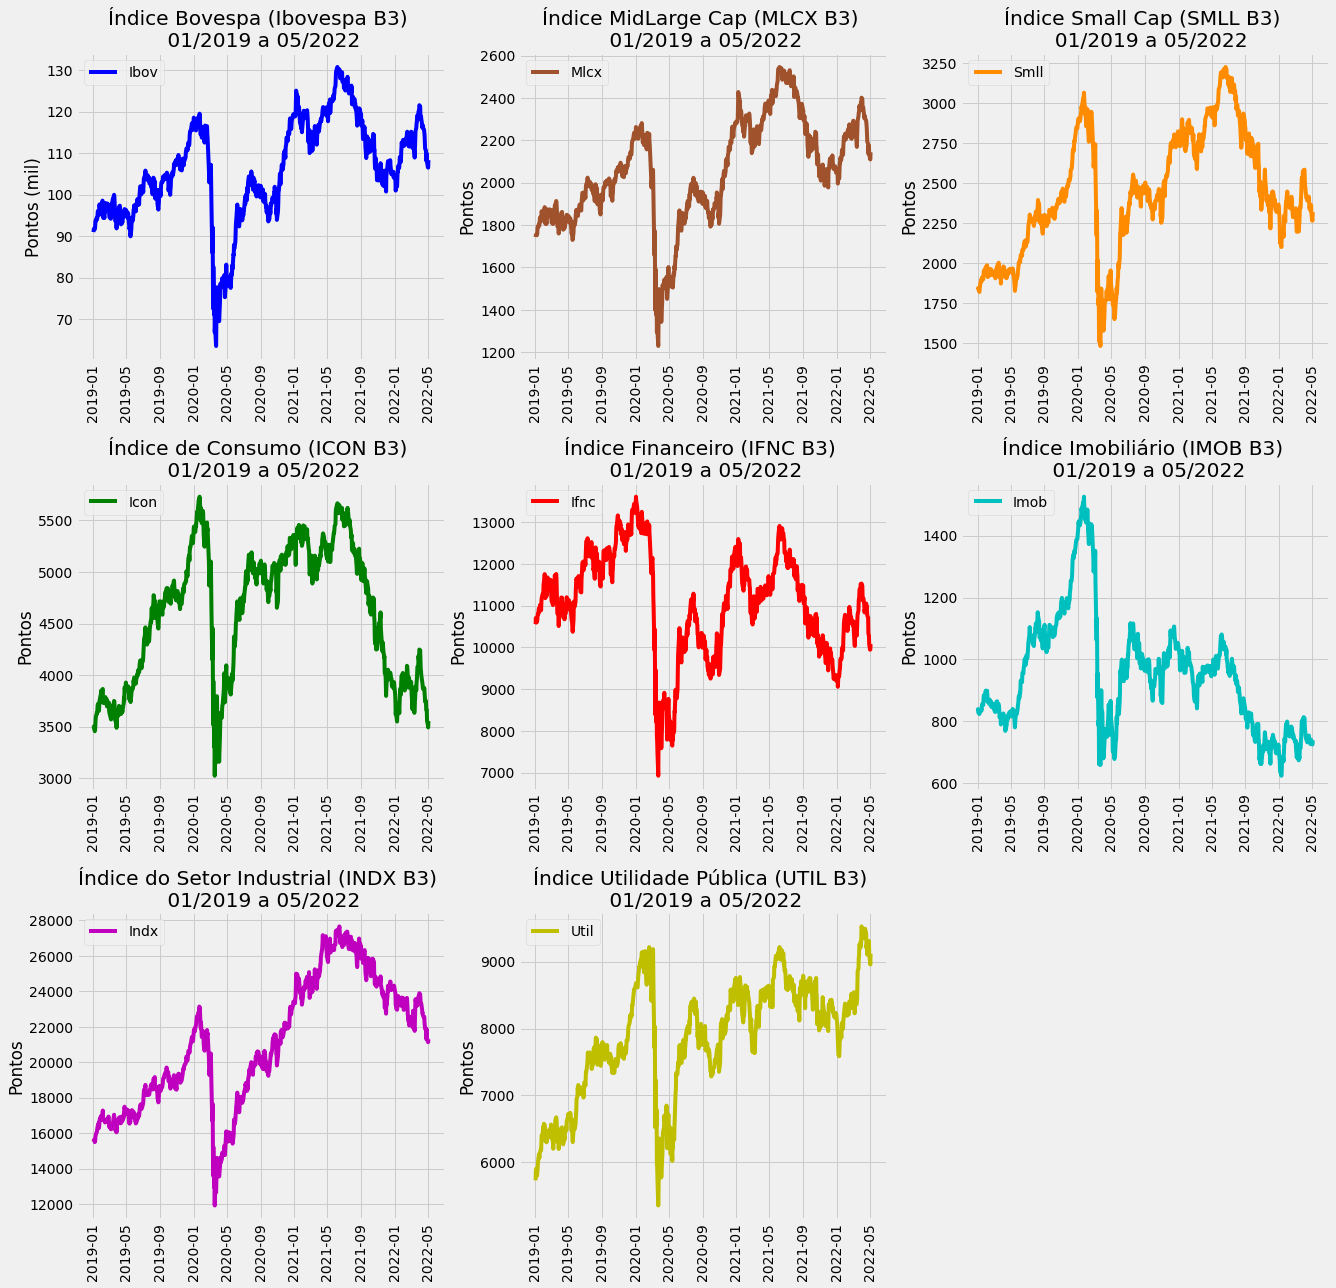

In [ ]:
#plotando o gráfico de cada Índice separadamente

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))

plt.subplot(3,3,1), plt.plot(ibov.index, ibov['Último'], label="Ibov", color = 'b'), plt.legend(loc="upper left"), plt.title("Índice Bovespa (Ibovespa B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos (mil)"), plt.xticks(rotation=90)

plt.subplot(3,3,2), plt.plot(mlcx.index, mlcx['Último'], label="Mlcx", color = 'sienna'), plt.legend(loc="upper left"), plt.title("Índice MidLarge Cap (MLCX B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplot(3,3,3), plt.plot(smll.index, smll['Último'], label="Smll", color = 'darkorange'), plt.legend(loc="upper left"), plt.title("Índice Small Cap (SMLL B3) \n  01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplot(3,3,4), plt.plot(icon.index, icon['Último'], label="Icon", color = 'g'), plt.legend(loc="upper left"), plt.title("Índice de Consumo (ICON B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplot(3,3,5), plt.plot(ifnc.index, ifnc['Último'], label="Ifnc", color = 'r'), plt.legend(loc="upper left"), plt.title("Índice Financeiro (IFNC B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplot(3,3,6), plt.plot(imob.index, imob['Último'], label="Imob", color = 'c'), plt.legend(loc="upper left"), plt.title("Índice Imobiliário (IMOB B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplot(3,3,7), plt.plot(indx.index, indx['Último'], label="Indx", color = 'm'), plt.legend(loc="upper left"), plt.title("Índice do Setor Industrial (INDX B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplot(3,3,8), plt.plot(util.index, util['Último'], label="Util", color ='y'), plt.legend(loc="upper left"), plt.title("Índice Utilidade Pública (UTIL B3) \n 01/2019 a 05/2022"),
plt.ylabel("Pontos"), plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance

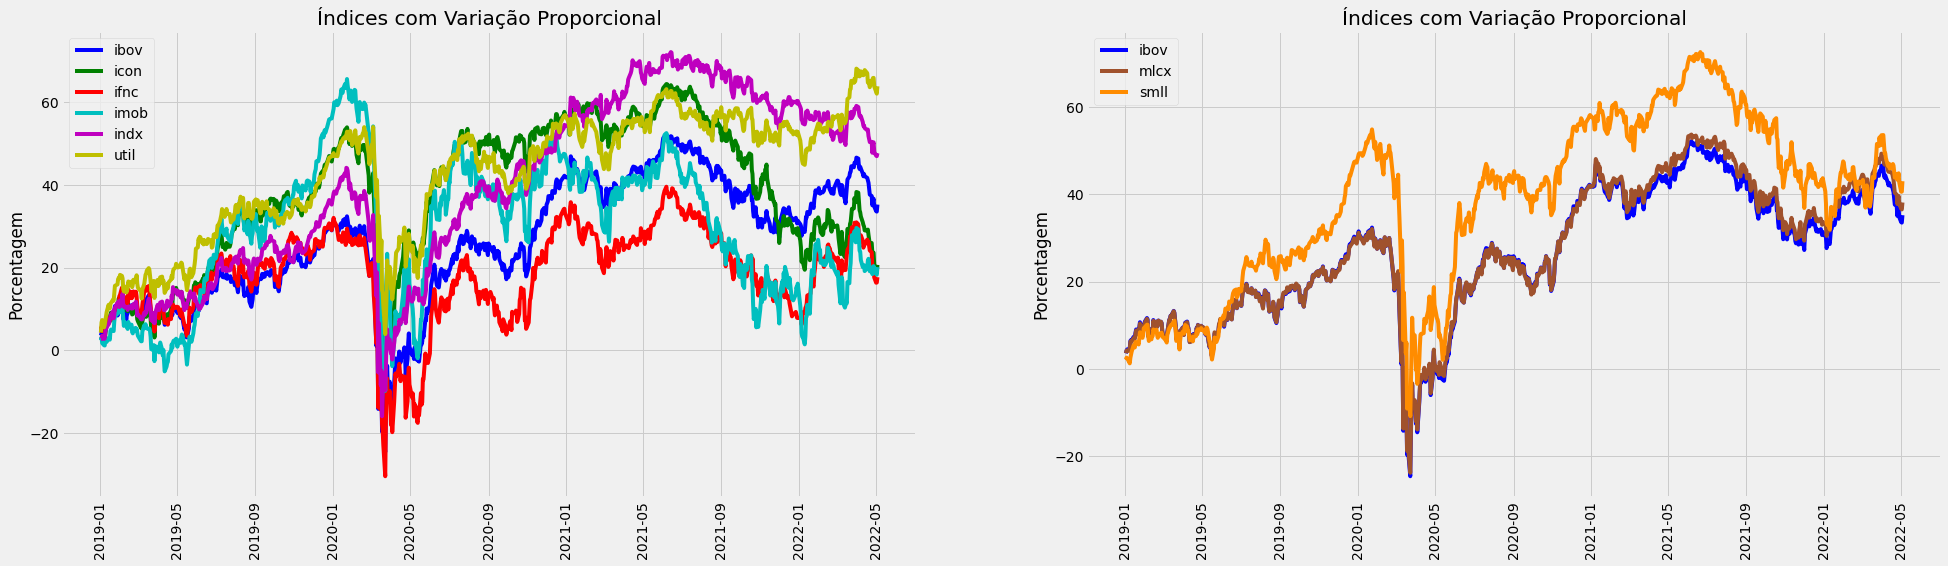

In [ ]:
from cycler import cycler
plt.figure(figsize=(25,8))

for df in df_list:
  if (df is not mlcx) & (df is not smll):
    plt.rc('axes', prop_cycle=(cycler('color', ['b', 'g','r', 'c', 'm', 'y'])))
    plt.subplot(1,2,1), plt.plot(df.index, df['Var%2']), plt.legend(['ibov', 'icon', 'ifnc', 'imob', 'indx', 'util'], loc="upper left"), plt.title("Índices com Variação Proporcional"), plt.ylabel("Porcentagem"), plt.xticks(rotation=90)

for df in df_list:
  if (df is ibov) | (df is mlcx) | (df is smll):
    plt.rc('axes', prop_cycle=(cycler('color', ['b', 'sienna', 'darkorange'])))
    plt.subplot(1,2,2), plt.plot(df.index, df['Var%2']), plt.legend(['ibov','mlcx', 'smll'], loc="upper left"), plt.title("Índices com Variação Proporcional"), plt.ylabel("Porcentagem"), plt.xticks(rotation=90)

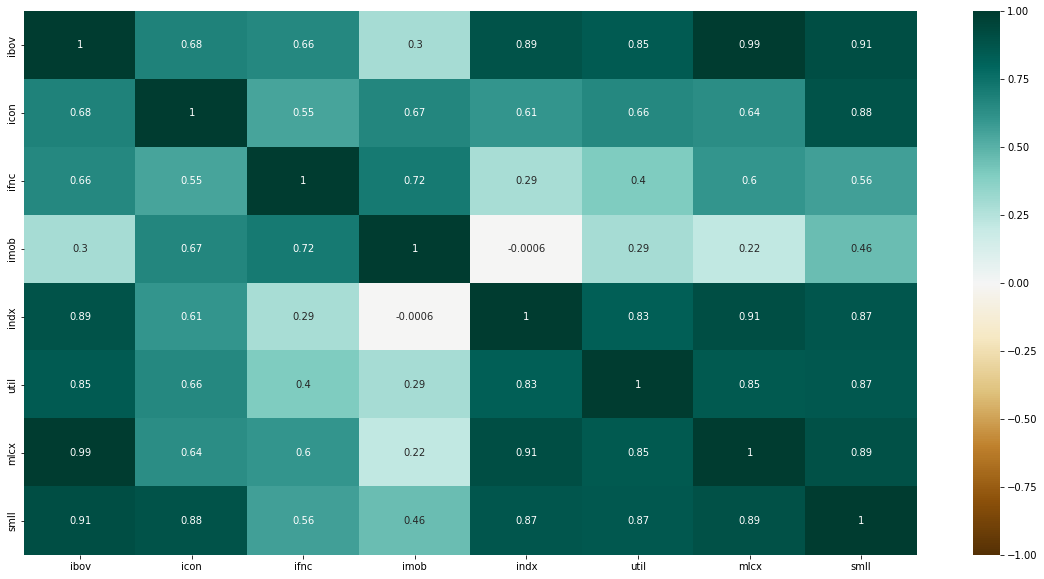

In [ ]:
# criar uma matriz de correlação entre os indices setoriais e segmentados

plt.figure(figsize=(20,10))
sns.heatmap(df_indices_juntos.corr(), annot=True, vmin=-1, vmax=1,cmap='BrBG')


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


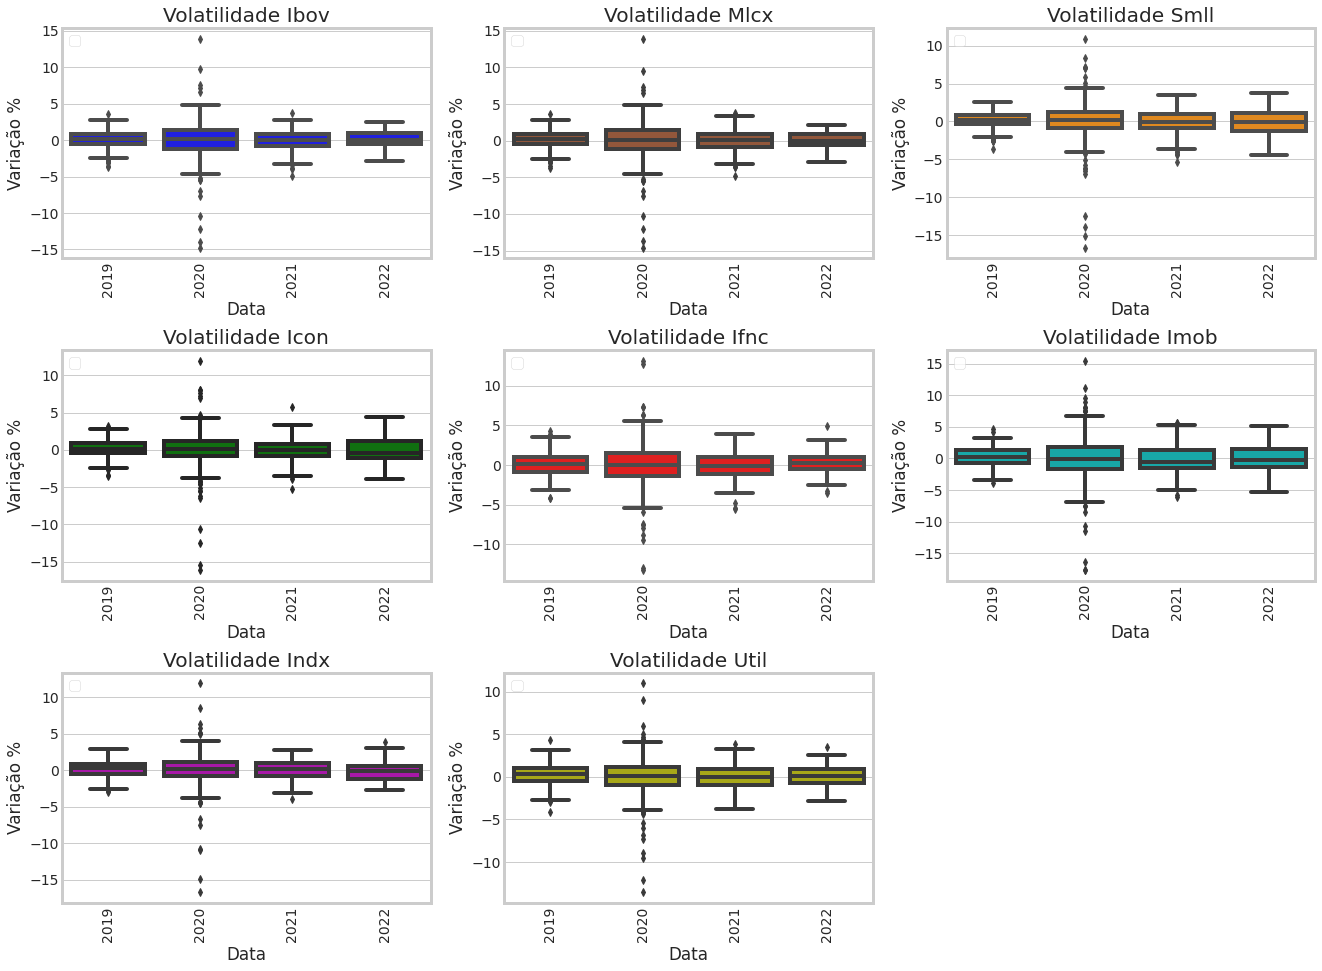

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))

plt.subplot(3,3,1), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['ibov var'],
                                color = 'b'),plt.legend(loc="upper left"), plt.title("Volatilidade Ibov"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,2), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['mlcx var'],
color = 'sienna'),plt.legend(loc="upper left"), plt.title("Volatilidade Mlcx"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,3), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['smll var'],
color = 'darkorange'),plt.legend(loc="upper left"), plt.title("Volatilidade Smll"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,4), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['icon var'],
color = 'g'),plt.legend(loc="upper left"), plt.title("Volatilidade Icon"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,5), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['ifnc var'],
color = 'r'),plt.legend(loc="upper left"), plt.title("Volatilidade Ifnc"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,6), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['imob var'],
color = 'c'),plt.legend(loc="upper left"), plt.title("Volatilidade Imob"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,7), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['indx var'],
color = 'm'),plt.legend(loc="upper left"), plt.title("Volatilidade Indx"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplot(3,3,8), sns.boxplot(data = df_indices_juntos_var, x = df_indices_juntos_var.index.year, y = df_indices_juntos_var['util var'],
color ='y'),plt.legend(loc="upper left"), plt.title("Volatilidade Util"),plt.ylabel("Variação %"), plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.4)

In [ ]:
def conserta_setores(setor):
  if setor == 'Cons N  Básico' or setor == 'Cons N Cíclico': return 'Consumo Não Cíclico'
  if setor == "Financ e Outros": return "Financeiro e Outros"
  else: return setor

segmento_2020=pd.concat([majmin_ibov2020, majmin_mlcx2020, majmin_smll2020], axis=0)
segmento_2020=segmento_2020.sort_values('2020')
segmento_2020.reset_index(inplace=True)
segmento_2020.rename(columns={'index': 'ação'}, inplace = True)
segmento_2020.drop_duplicates(subset ="ação", inplace = True)
segmento_2020.loc[[19],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BANCO INTER']
segmento_2020.loc[[2],['Setor']] = ['Financeiro e Outros']
segmento_2020['Setor']=segmento_2020['Setor'].apply(conserta_setores)


In [ ]:
segmento_2020

,ação,2020,Setor,Subsetor,Empresa
0,PCAR3,-91.76,Consumo Não Cíclico,Comércio Distr.,P.ACUCAR-CBD
2,IRBR3,-86.64,Financeiro e Outros,Previd Seguros,IRBBRASIL RE
4,PMAM3,-75.74,Mats Básicos,Sid Metalurgia,PARANAPANEMA
5,TECN3,-74.82,Consumo Cíclico,Tecid Vest Calç,TECHNOS
6,COGN3,-56.24,Diverso,Diversos,COGNA ON
8,EMBR3,-50.84,Bens Indls,Mat Transporte,EMBRAER
9,CIEL3,-44.94,Financeiro e Outros,Serviços Financeiros Diversos,CIELO
10,BRFS3,-27.84,Consumo Não Cíclico,Alimentos Processados,BRF SA
11,NEOE3,-20.32,Utilidade Públ,Energ Elétrica,NEOENERGIA
12,RAIL3,-13.42,Bens Indls,Transporte,RUMO S.A.


(<matplotlib.axes._subplots.AxesSubplot at 0x7fb2d7aabd50>,
 Text(0, 0.5, 'Variação Anual Total'))

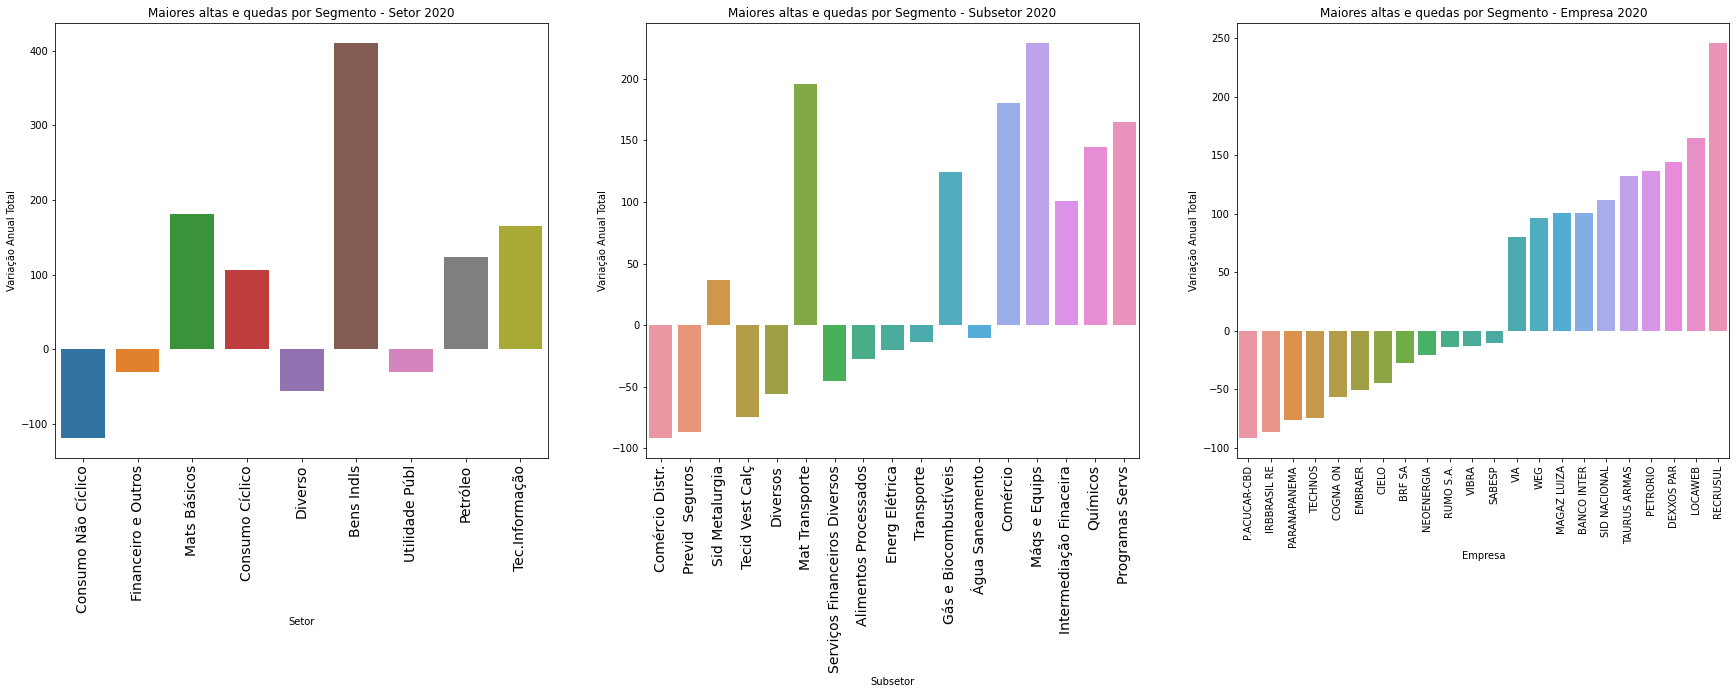

In [ ]:
plt.figure(figsize=(30,8))

plt.subplot(1,3,1), plt.xticks(rotation=90), plt.title('Maiores altas e quedas por Segmento - Setor 2020')
sns.barplot(x=segmento_2020['Setor'], y=segmento_2020['2020'], data=segmento_2020, ci=None, estimator=sum), plt.ylabel("Variação Anual Total"), plt.tick_params(axis='x', which='major', labelsize=14)

plt.subplot(1,3,2), plt.xticks(rotation=90), plt.title('Maiores altas e quedas por Segmento - Subsetor 2020')
sns.barplot(x=segmento_2020['Subsetor'], y=segmento_2020['2020'], data=segmento_2020, ci=None, estimator=sum), plt.ylabel("Variação Anual Total"), plt.tick_params(axis='x', which='major', labelsize=14)

plt.subplot(1,3,3), plt.xticks(rotation=90), plt.title('Maiores altas e quedas por Segmento - Empresa 2020')
sns.barplot(x=segmento_2020['Empresa'], y=segmento_2020['2020'], data=segmento_2020, ci=None, estimator=sum), plt.ylabel("Variação Anual Total")

In [ ]:
majmin_ibov2020.loc[['BIDI1'],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BANCO INTER']
majmin_ibov2020.loc[['IRBR3'],['Setor']] = ['Financeiro e Outros']

In [ ]:
majmin_mlcx2020.loc[['BIDI1'],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BANCO INTER']

In [ ]:
majmin_mlcx2020

,2020,Setor,Subsetor,Empresa
PRIO3,136.77,Petróleo,Gás e Biocombustíveis,PETRORIO
CSNA3,112.08,Mats Básicos,Sid Metalurgia,SID NACIONAL
BIDI1,100.80,Financeiro e Outros,Intermediação Finaceira,BANCO INTER
MGLU3,100.62,Consumo Cíclico,Comércio,MAGAZ LUIZA
WEGE3,96.18,Bens Indls,Máqs e Equips,WEG
BRFS3,-27.84,Cons N Básico,Alimentos Processados,BRF SA
NEOE3,-20.32,Utilidade Públ,Energ Elétrica,NEOENERGIA
RAIL3,-13.42,Bens Indls,Transporte,RUMO S.A.
VBBR3,-12.94,Petróleo,Gás e Biocombustíveis,VIBRA
SBSP3,-10.28,Utilidade Públ,Água Saneamento,SABESP


(<BarContainer object of 10 artists>,
 Text(0, 0.5, 'Variação Anual Total'))

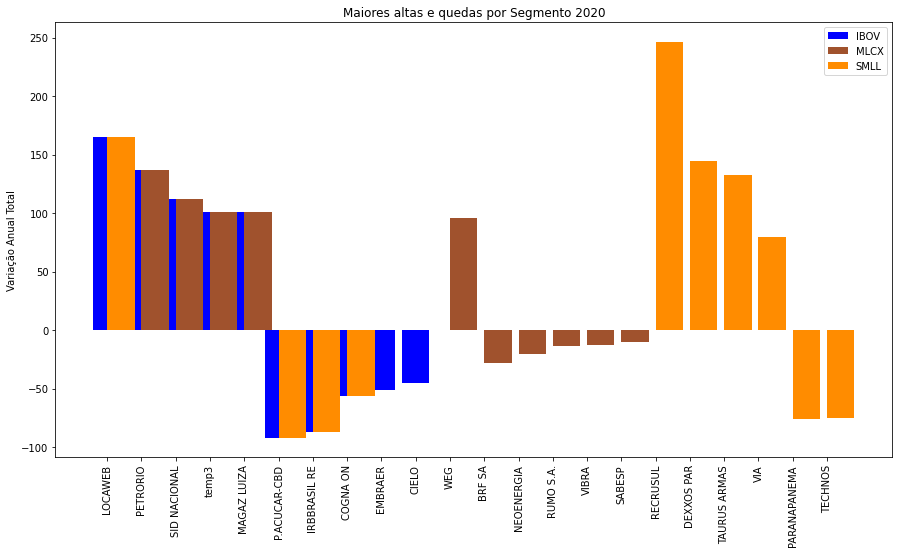

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90), plt.title('Maiores altas e quedas por Segmento 2020')
width = 0.2
plt.bar(majmin_ibov2020['Empresa'], majmin_ibov2020['2020'], label="IBOV", color = 'b'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")
plt.bar(majmin_mlcx2020['Empresa'], majmin_mlcx2020['2020'], label="MLCX",align='edge',color = 'sienna'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")
plt.bar(majmin_smll2020['Empresa'], majmin_smll2020['2020'], label="SMLL",align='edge',color = 'darkorange'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")


In [ ]:
segmento_2020.set_index(['Setor','Subsetor'], inplace=True)
segmento_2020.sort_index(inplace=True)

In [ ]:
segmento_2020

ação    2020       Empresa
Setor               Subsetor                                                  
Bens Indls          Mat Transporte                 EMBR3  -50.84       EMBRAER
                    Mat Transporte                 RCSL3  246.02      RECRUSUL
                    Máqs e Equips                  WEGE3   96.18           WEG
                    Máqs e Equips                  TASA4  132.71  TAURUS ARMAS
                    Transporte                     RAIL3  -13.42     RUMO S.A.
Cons N  Básico      Alimentos Processados          BRFS3  -27.84        BRF SA
Cons N Cíclico      Comércio Distr.                PCAR3  -91.76  P.ACUCAR-CBD
Consumo Cíclico     Comércio                       VIIA3   79.81           VIA
                    Comércio                       MGLU3  100.62   MAGAZ LUIZA
                    Tecid Vest Calç                TECN3  -74.82       TECHNOS
Diverso             Diversos                       COGN3  -56.24      COGNA ON
Financeiro e Outros Intermediação Finaceira        BIDI1  100.80   BANCO INTER
                    Previd  Seguros                IRBR3  -86.64  IRBBRASIL RE
                    Serviços Financeiros Diversos  CIEL3  -44.94         CIELO
Mats Básicos        Químicos                       DEXP3  144.29    DEXXOS PAR
                    Sid Metalurgia                 PMAM3  -75.74  PARANAPANEMA
                    Sid Metalurgia                 CSNA3  112.08  SID NACIONAL
Petróleo            Gás e Biocombustíveis          VBBR3  -12.94         VIBRA
                    Gás e Biocombustíveis          PRIO3  136.77      PETRORIO
Tec.Informação      Programas Servs                LWSA3  165.02       LOCAWEB
Utilidade Públ      Energ Elétrica                 NEOE3  -20.32    NEOENERGIA
                    Água Saneamento                SBSP3  -10.28        SABESP

In [ ]:
def conserta_setores(setor):
  if setor == 'Cons N  Básico' or setor == 'Cons N Cíclico': return 'Consumo Não Cíclico'
  if setor == "Financ e Outros": return "Financeiro e Outros"
  else: return setor


setoriais_2020=pd.concat([majmin_icon2020, majmin_ifnc2020, majmin_imob2020, majmin_indx2020, majmin_util2020], axis=0)
setoriais_2020=setoriais_2020.sort_values('2020')
setoriais_2020.reset_index(inplace=True)
setoriais_2020.rename(columns={'index': 'ação'}, inplace = True)
setoriais_2020.drop_duplicates(subset ="ação", inplace = True)
setoriais_2020.loc[[46],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BANCO INTER']
setoriais_2020.loc[[21],['Setor', 'Subsetor', 'Empresa']] = ['Utilidade Públ', 'Saneamento', 'SANEPAR']
setoriais_2020.loc[[37],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BTG PACTUAL BANCO']
setoriais_2020['Setor']=setoriais_2020['Setor'].apply(conserta_setores)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb2d73a3090>,
 Text(0, 0.5, 'Variação Anual Total'))

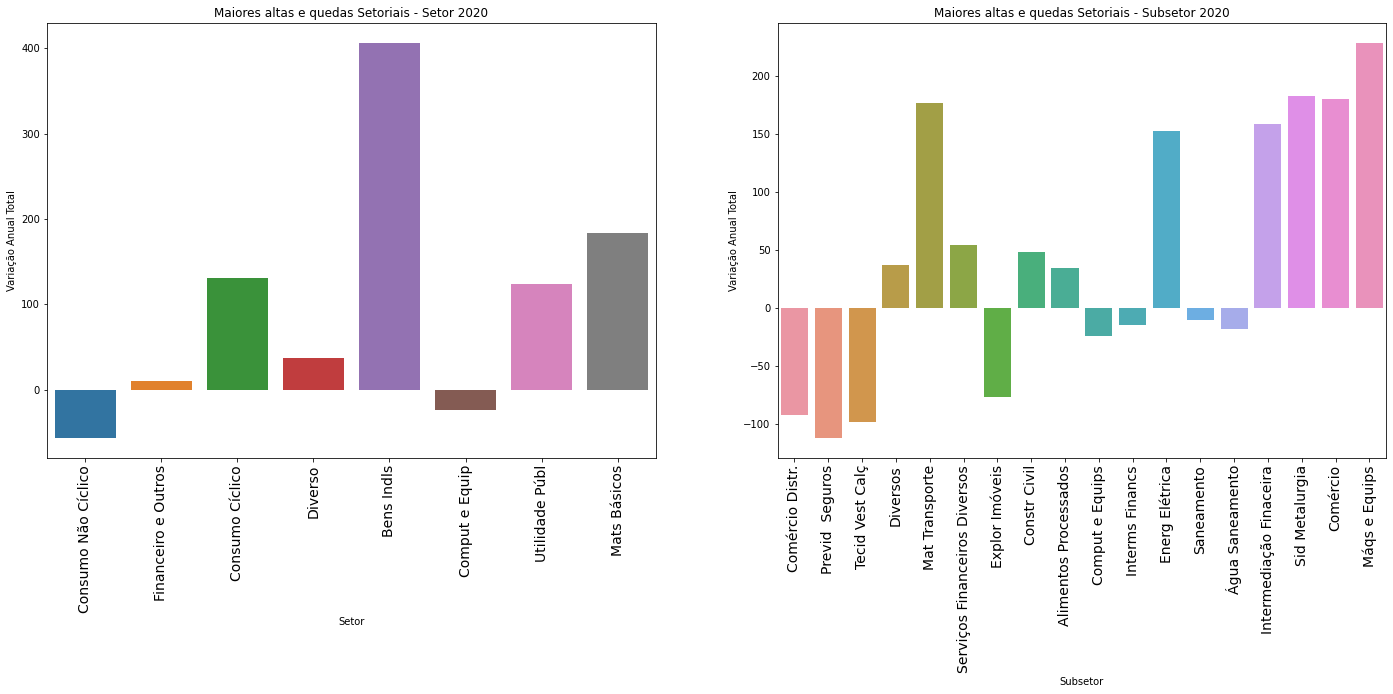

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1), plt.xticks(rotation=90), plt.title('Maiores altas e quedas Setoriais - Setor 2020'), plt.tick_params(axis='x', which='major', labelsize=14)
sns.barplot(x=setoriais_2020['Setor'], y=setoriais_2020['2020'], data=setoriais_2020, ci=None, estimator=sum),plt.ylabel("Variação Anual Total")

plt.subplot(1,2,2), plt.xticks(rotation=90), plt.title('Maiores altas e quedas Setoriais - Subsetor 2020'), plt.tick_params(axis='x', which='major', labelsize=14)
sns.barplot(x=setoriais_2020['Subsetor'], y=setoriais_2020['2020'], data=setoriais_2020, ci=None, estimator=sum),plt.ylabel("Variação Anual Total")



(<matplotlib.axes._subplots.AxesSubplot at 0x7fb2d6f9d7d0>,
 Text(0, 0.5, 'Variação Anual Total'))

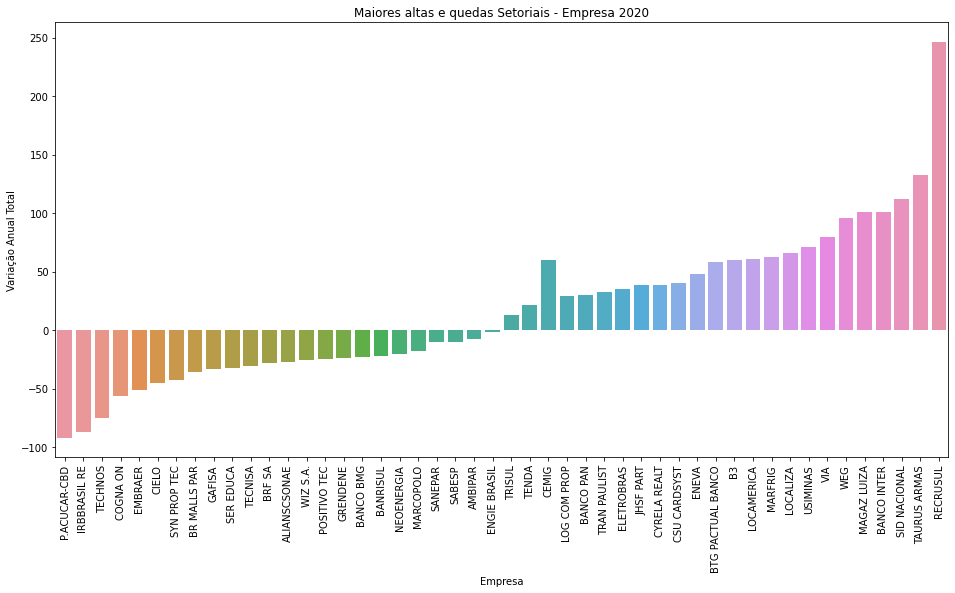

In [ ]:
plt.figure(figsize=(16,8))

plt.xticks(rotation=90), plt.title('Maiores altas e quedas Setoriais - Empresa 2020')
sns.barplot(x=setoriais_2020['Empresa'], y=setoriais_2020['2020'], data=setoriais_2020, ci=None, estimator=sum), plt.ylabel("Variação Anual Total")

In [ ]:
majmin_util2020

,2020,Setor,Subsetor,Empresa
ENEV3,47.93,Utilidade Públ,Energ Elétrica,ENEVA
ELET3,34.85,Utilidade Públ,Energ Elétrica,ELETROBRAS
TRPL4,32.67,Utilidade Públ,Energ Elétrica,TRAN PAULIST
CMIG3,30.60,Utilidade Públ,Energ Elétrica,CEMIG
CMIG4,29.12,Utilidade Públ,Energ Elétrica,CEMIG
NEOE3,-20.32,Utilidade Públ,Energ Elétrica,NEOENERGIA
SAPR1,-10.53,temp,temp1,temp3
SBSP3,-10.28,Utilidade Públ,Água Saneamento,SABESP
AMBP3,-7.74,Utilidade Públ,Água Saneamento,AMBIPAR
EGIE3,-1.92,Utilidade Públ,Energ Elétrica,ENGIE BRASIL


In [ ]:
def conserta_setores(setor):
  if setor == 'Cons N  Básico' or setor == 'Cons N Cíclico': return 'Consumo Não Cíclico'
  if setor == "Financ e Outros": return "Financeiro e Outros"
  else: return setor

majmin_ifnc2020.loc[['BIDI1'],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BANCO INTER']
majmin_ifnc2020.loc[['BPAC1'],['Setor', 'Subsetor', 'Empresa']] = ['Financeiro e Outros', 'Intermediação Finaceira', 'BTG PACTUAL BANCO']
majmin_util2020.loc[['SAPR1'],['Setor', 'Subsetor', 'Empresa']] = ['Utilidade Públ', 'Saneamento', 'SANEPAR']
majmin_ifnc2020['Setor']=majmin_ifnc2020['Setor'].apply(conserta_setores)

In [ ]:
majmin_ifnc2020

,2020,Setor,Subsetor,Empresa
BIDI1,100.80,Financeiro e Outros,Intermediação Finaceira,BANCO INTER
B3SA3,59.80,Financeiro e Outros,Serviços Financeiros Diversos,B3
BPAC1,57.99,Financeiro e Outros,Intermediação Finaceira,BTG PACTUAL BANCO
CARD3,39.92,Financeiro e Outros,Serviços Financeiros Diversos,CSU CARDSYST
BPAN4,30.10,Financeiro e Outros,Interms Financs,BANCO PAN
IRBR3,-86.64,Financeiro e Outros,Previd Seguros,IRBBRASIL RE
CIEL3,-44.94,Financeiro e Outros,Serviços Financeiros Diversos,CIELO
WIZS3,-25.64,Financeiro e Outros,Previd Seguros,WIZ S.A.
BMGB4,-23.13,Financeiro e Outros,Interms Financs,BANCO BMG
BRSR6,-21.79,Financeiro e Outros,Interms Financs,BANRISUL


(<BarContainer object of 10 artists>,
 Text(0, 0.5, 'Variação Anual Total'))

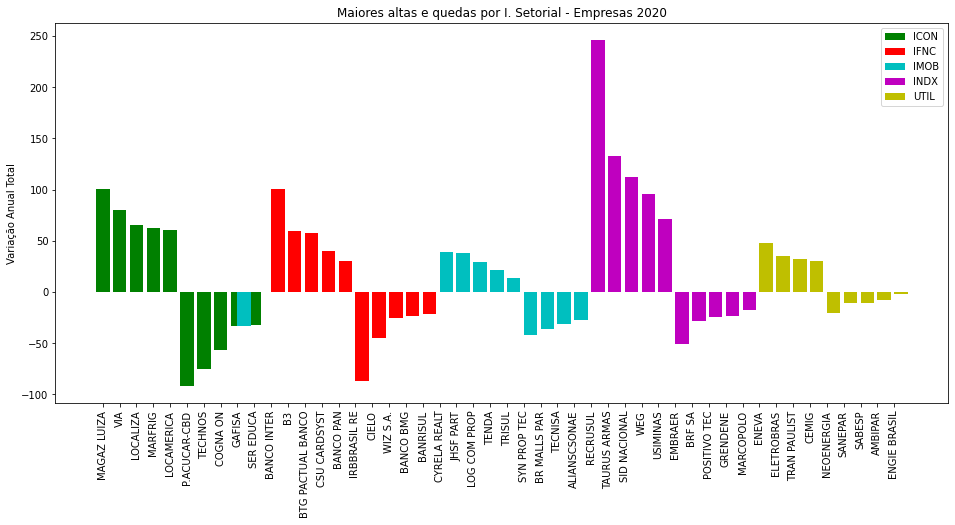

In [ ]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=90), plt.title('Maiores altas e quedas por I. Setorial - Empresas 2020')
plt.bar(majmin_icon2020['Empresa'], majmin_icon2020['2020'], label="ICON", color = 'g'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")
plt.bar(majmin_ifnc2020['Empresa'], majmin_ifnc2020['2020'], label="IFNC",align='edge',color = 'r'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")
plt.bar(majmin_imob2020['Empresa'], majmin_imob2020['2020'], label="IMOB",align='edge',color = 'c'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")
plt.bar(majmin_indx2020['Empresa'], majmin_indx2020['2020'], label="INDX",align='edge',color = 'm'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")
plt.bar(majmin_util2020['Empresa'], majmin_util2020['2020'], label="UTIL",align='edge',color = 'y'), plt.legend(loc="upper right"),plt.ylabel("Variação Anual Total")

In [ ]:
setoriais_2020.set_index(['Setor','Subsetor'])
setoriais_2020.sort_index()


In [ ]:
setoriais_2020

ação    2020  \
Setor               Subsetor                                       
Bens Indls          Mat Transporte                 EMBR3  -50.84   
                    Mat Transporte                 POMO4  -17.70   
                    Mat Transporte                 RCSL3  246.02   
                    Máqs e Equips                  WEGE3   96.18   
                    Máqs e Equips                  TASA4  132.71   
Comput e Equip      Comput e Equips                POSI3  -24.24   
Consumo Cíclico     Comércio                       VIIA3   79.81   
                    Comércio                       MGLU3  100.62   
                    Constr Civil                   GFSA3  -32.88   
                    Constr Civil                   TCSA3  -30.91   
                    Constr Civil                   TRIS3   13.32   
                    Constr Civil                   TEND3   21.34   
                    Constr Civil                   JHSF3   38.51   
                    Constr Civil                   CYRE3   38.88   
                    Tecid Vest Calç                TECN3  -74.82   
                    Tecid Vest Calç                GRND3  -23.51   
Consumo Não Cíclico Alimentos Processados          BRFS3  -27.84   
                    Alimentos Processados          MRFG3   62.64   
                    Comércio Distr.                PCAR3  -91.76   
Diverso             Diversos                       COGN3  -56.24   
                    Diversos                       SEER3  -32.44   
                    Diversos                       LCAM3   60.71   
                    Diversos                       RENT3   65.65   
Financeiro e Outros Explor Imóveis                 SYNE3  -42.26   
                    Explor Imóveis                 BRML3  -35.92   
                    Explor Imóveis                 ALSO3  -27.65   
                    Explor Imóveis                 LOGG3   29.20   
                    Intermediação Finaceira        BPAC1   57.99   
                    Intermediação Finaceira        BIDI1  100.80   
                    Interms Financs                BMGB4  -23.13   
                    Interms Financs                BRSR6  -21.79   
                    Interms Financs                BPAN4   30.10   
                    Previd  Seguros                IRBR3  -86.64   
                    Previd  Seguros                WIZS3  -25.64   
                    Serviços Financeiros Diversos  CIEL3  -44.94   
                    Serviços Financeiros Diversos  CARD3   39.92   
                    Serviços Financeiros Diversos  B3SA3   59.80   
Mats Básicos        Sid Metalurgia                 USIM5   71.20   
                    Sid Metalurgia                 CSNA3  112.08   
Utilidade Públ      Energ Elétrica                 NEOE3  -20.32   
                    Energ Elétrica                 EGIE3   -1.92   
                    Energ Elétrica                 CMIG4   29.12   
                    Energ Elétrica                 CMIG3   30.60   
                    Energ Elétrica                 TRPL4   32.67   
                    Energ Elétrica                 ELET3   34.85   
                    Energ Elétrica                 ENEV3   47.93   
                    Saneamento                     SAPR1  -10.53   
                    Água Saneamento                SBSP3  -10.28   
                    Água Saneamento                AMBP3   -7.74   

                                                             Empresa  
Setor               Subsetor                                          
Bens Indls          Mat Transporte                           EMBRAER  
                    Mat Transporte                         MARCOPOLO  
                    Mat Transporte                          RECRUSUL  
                    Máqs e Equips                                WEG  
                    Máqs e Equips                       TAURUS ARMAS  
Comput e Equip      Comput e Equips                     POSITIVO TEC  
Consumo Cíclico